## 손실함수

- 손실함수는 학습이 진행되면서 해당 과정이 얼마나 잘 되고 있는지 나타내는 지표
- 모델이 훈련되는 동안 최소화될 값으로 주어진 문제에 대한 성공 지표
- 손실 함수에 따른 결과를 통해 파라미터를 조정하며 학습이 진행
- 손실함수는 최적화 이론에서 최소화 하고자 하는 함수로 미분 가능한 함수를 사용
- Keras에서 제공되는 주요 손실 함수
    - 'sparse_categorical_crossentropy' : 클래스가 배타적 방식으로 구분, 즉 (0,1,2, ... ,9)와 같은 방식으로 구분되어 있을 때 사용
    - 'categorical_cross_entropy' : 클래스가 One - hot encoding 방식으로 되어 있을 때 사용
    - 'binary_crossentropy' : 이진 분류를 수행할 때 사용

### 평균절대오차 (MAE)

- 오차가 커져도 손실함수가 일정하게 증가
- 이상치에 강건한(Robust) 특성
- 데이터에서 [입력 - 정답]관계가 적절하지 않은 것이 있을 경우에, 좋은 추정을 하더라도 오차가 발생하는 경우가 발생함. 이상치에 해당하는 지점에서 손실함수의 최소값으로 가는 정도의 영향력이 크지 않은 특성을 가지고 있음
- 일반적으로 회귀에 많이 사용하는 손실함수

![MAE](./imgs/MAE.png)

### 평균제곱오차 (MSE)

- 가장 많이 사용되는 손실 함수 중 하나
- 오차가 커질수록 손실함수가 빠르게 증가하는 특성
- 정답과 예측한 값의 차이가 클수록 더 많은 페널티를 부여하는 형태로 동작
- 일반적으로 회귀에 사용되는 손실함수

![MSE](./imgs/MSE.png)

### One - Hot Encoding

- 범주형 변수를 표현할 때 사용
- 가변수라고도 함
- 정답인 레이블만 1이고 나머지는 0으로 처리하는 형태

### 교차 엔트로피 오차 (Cross Entropy Error, CEE)

- 이진 분류 또는 다중 클래스 분류에 주로 사용
- 오차는 softmax 결과와 One-hot 사이의 출력 간 거리를 비교
- 정답을 맞추면 오차가 0, 틀리면 그 차이가 클수록 오차가 무한히 커짐
- 전체의 합은 1
- 정답을 맞추면 0에 근접하게 됨

![CEE](./imgs/CEE.png)

## Optimizer

- optimizer는 손실 함수를 기반으로 모델이 어떻게 업데이트되어야 하는지 결정
- Keras에서 optimizer를 제공하고, 사용자가 특정 종류의 확률적 경사 하강법 지정 가능
    - keras.optimizer.SGD() : 기본적인 확률적 경사 하강법
    - keras.optimizer.Adam() : 자주 사용되는 optimizer
- 보통 optimizer의 튜닝을 위해 따로 객체를생성하여 컴파일시에 포함

### 경사하강법

- 경사하강법은 미분과 기울기로 동작하며, 스칼라를 벡터로 미분
- 변화가 있는 지점에서는 미분값이 존재하고, 변화가 없는 지점은 미분값이 0이 되며, 미분값이 클수록 변화량이 큼
- 경사하강법의 과정은 한 스텝마다의 미분값에 따라 이동하는 방향을 결정, $f(x)$의 값이 변하지 않을때까지 반복

![GD](./imgs/gd.png)

### 볼록함수와 비볼록함수

- 볼록함수는 어떤 지점에서 시작하더라도 최적값(손실함수가 최소로하는 점)에 도달 가능
- 비볼록함수는 시작점 위치에 따라 다른 최적값에 도달할 수 있음

![convex](./imgs/convex.png)

### 안장점

- 기울기가 0이지만 극값이 되지 않는 안장점이 존재
- 경사하강법은 안장점에서 벗아니지 못하는 문제가 있음

<img src="./imgs/saddle_point.png" width="300" height="250"/>

### 학습률

- 모델을 학습하기 위해서는 적절한 학습률을 지정해야 최저점에 잘 도달할 수 있음
- 학습률이 너무 크면 발산하고, 너무 작으면 학습이 오래 걸리거나 최저점에 도달하지 못하는 문제가 있음

<img src="./imgs/lr.png" width="700" height="250"/>

### 지표

- 딥러닝 학습 시 필요한 다양한 지표들을 지정 가능
- 일반적으로 MAE나 Accuracy를 사용
- Kears에서 사용되는 지표 종류 : [참고 링크]("https://keras.io/ko/metrics")

## Training

<img src="./imgs/structure.png" width="600" height="500"/>

### 데이터 생성

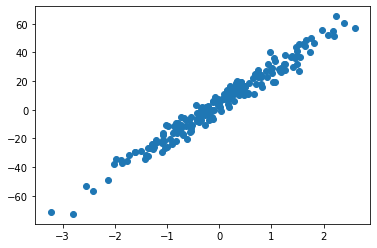

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=200, n_features=1, 
                       bias=5.0, noise=5.0, random_state=123)
y = np.expand_dims(y, axis=1)

plt.scatter(X, y)
plt.show()

In [2]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    shuffle=True,
                                                    
                                                    random_state=123)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(160, 1) (160, 1)
(40, 1) (40, 1)


### 모델 생성

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, optimizers, utils

In [4]:
model = keras.Sequential()
model.add(layers.Dense(1, activation='linear', input_shape=(1,)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


2023-07-25 13:14:28.669631: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


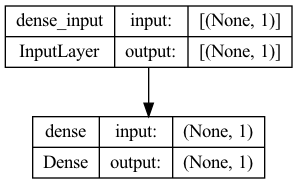

In [5]:
utils.plot_model(model, show_shapes=True)

### 모델 학습

In [6]:
optimizer = optimizers.SGD()
model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
history = model.fit(x_train, y_train, epochs=40)

Epoch 1/40
5/5 [==============================] - 0s 2ms/step - loss: 598.2895 - mae: 19.6970 - mse: 598.2895
Epoch 2/40
5/5 [==============================] - 0s 1ms/step - loss: 479.9678 - mae: 17.6023 - mse: 479.9678
Epoch 3/40
5/5 [==============================] - 0s 1ms/step - loss: 386.5411 - mae: 15.7867 - mse: 386.5411
Epoch 4/40
5/5 [==============================] - 0s 4ms/step - loss: 312.4131 - mae: 14.1685 - mse: 312.4131
Epoch 5/40
5/5 [==============================] - 0s 3ms/step - loss: 253.1559 - mae: 12.7916 - mse: 253.1559
Epoch 6/40
5/5 [==============================] - 0s 5ms/step - loss: 205.8406 - mae: 11.5194 - mse: 205.8406
Epoch 7/40
5/5 [==============================] - 0s 8ms/step - loss: 168.5339 - mae: 10.4351 - mse: 168.5339
Epoch 8/40
5/5 [==============================] - 0s 3ms/step - loss: 138.0548 - mae: 9.4453 - mse: 138.0548
Epoch 9/40
5/5 [==============================] - 0s 2ms/step - loss: 114.2460 - mae: 8.5532 - mse: 114.2460
Epoch 10/40


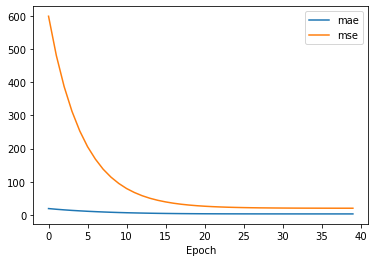

In [7]:
plt.plot(history.history['mae'])
plt.plot(history.history['mse'])
plt.xlabel('Epoch')
plt.legend(['mae', 'mse'])
plt.show();

### 모델 평가

In [8]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 17ms/step - loss: 21.9207 - mae: 3.9883 - mse: 21.9207


[21.9206600189209, 3.988262176513672, 21.9206600189209]

### 모델 예측

7/7 [==============================] - 0s 2ms/step


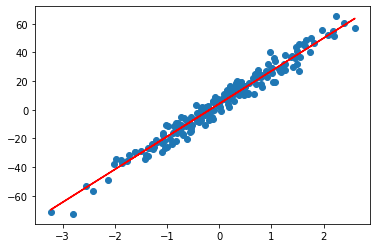

In [9]:
result = model.predict(X)

plt.scatter(X, y)
plt.plot(X, result, 'r')
plt.show()

In [10]:
model.layers

In [11]:
layer = model.layers[0]
print(layer.name)
layer = model.get_layer('dense')
print(layer.name)

dense
dense


In [12]:
weights, biases = layer.get_weights()
print(weights)
print(biases)

[[22.90367]]
[4.177095]


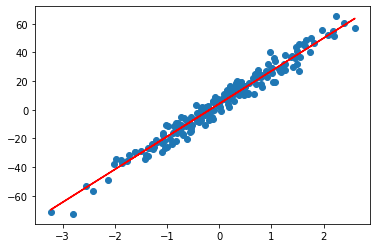

In [13]:
plt.scatter(X, y)
plt.plot(X, np.array(weights * X + biases), 'r')
plt.show()